Step 1 : load data

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from pathlib import Path

# Paths
data_dir_dam = Path("C:/Users/Archi/Documents/Ponts/Cours/S2/Datbi/DATBI2025-CANCER/DataSets") # replace with your own path
features_dir = data_dir_dam / "train_input/moco_features"
labels_path = data_dir_dam / "train_output.csv"

# Load labels
labels_df = pd.read_csv(labels_path)
labels_df.set_index("Sample ID", inplace=True)


Step 2 : aggregate tile features

In [2]:
X = []
y = []

for sample_id, row in labels_df.iterrows():
    path = os.path.join(features_dir, f"{sample_id}")
    if not os.path.exists(path):
        print(f"File not found: {path}")
        continue  # skip if missing

    mat = np.load(path)                  # shape: (1000, 2051)
    features = mat[:, 3:]                # only use last 2048 columns
    aggregated = features.mean(axis=0)   # average over tiles

    X.append(aggregated)
    y.append(row["Target"])

X = np.array(X)
y = np.array(y)


Step 3: Train a simple classifier

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict
y_pred_prob = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_prob)

print(f"AUC-ROC: {auc:.3f}")


AUC-ROC: 0.636


Step 4: Interpret Results

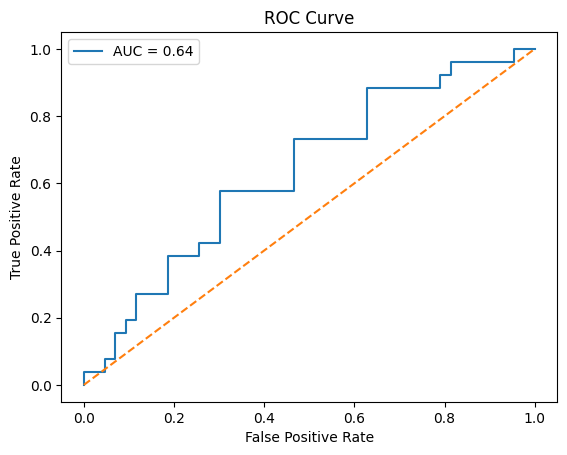

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
